## Example 1: Three Correlated Variables

Sample mean:
[ 5.00878969 10.02017668 15.00223065]

Sample covariance:
[[ 3.91116622  2.01085819  1.0487298 ]
 [ 2.01085819  8.94365748  2.74424016]
 [ 1.0487298   2.74424016 16.18283718]]


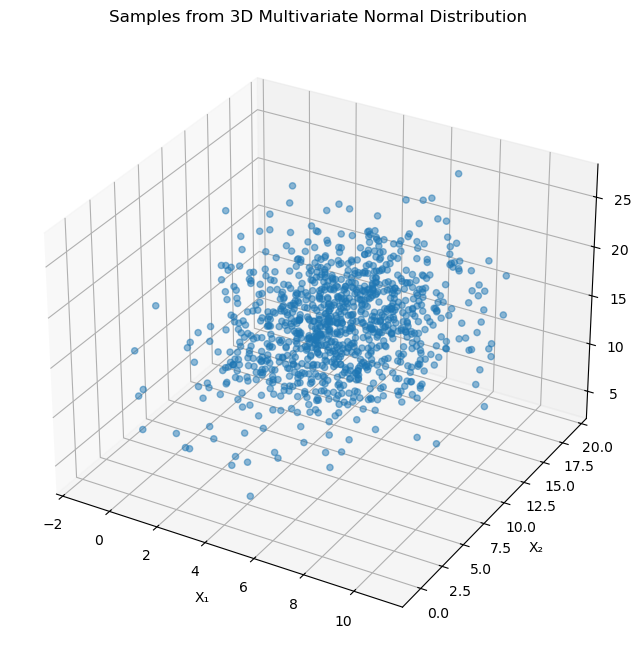

In [1]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_multivariate_normal(mean, cov, size=1):
    """
    Generate multivariate normal random variables with specified mean and covariance.
    
    Parameters:
    mean (array): Mean vector
    cov (array): Covariance matrix
    size (int): Number of samples to generate
    
    Returns:
    Array of shape (size, len(mean))
    """
    # Convert inputs to arrays
    mean = np.array(mean)
    cov = np.array(cov)
    
    # Get dimensions
    n = len(mean)
    
    # Calculate Cholesky decomposition
    L = cholesky(cov)
    
    # Generate independent standard normal variables
    Z = np.random.normal(0, 1, size=(size, n))
    
    # Transform to desired distribution
    X = mean + np.dot(Z, L.T)
    
    return X

# Example parameters
mean = [5, 10, 15]
cov = [
    [4, 2, 1],
    [2, 9, 3],
    [1, 3, 16]
]

# Generate samples
samples = generate_multivariate_normal(mean, cov, size=10000)

# Verify mean
print("Sample mean:")
print(np.mean(samples, axis=0))

# Verify covariance
print("\nSample covariance:")
print(np.cov(samples.T))

# Visualize 3D scatter plot of first 1000 samples
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[:1000, 0], samples[:1000, 1], samples[:1000, 2], alpha=0.5)
ax.set_xlabel('X₁')
ax.set_ylabel('X₂')
ax.set_zlabel('X₃')
ax.set_title('Samples from 3D Multivariate Normal Distribution')
plt.show()

## Example 2: Generating Correlated Financial Returns

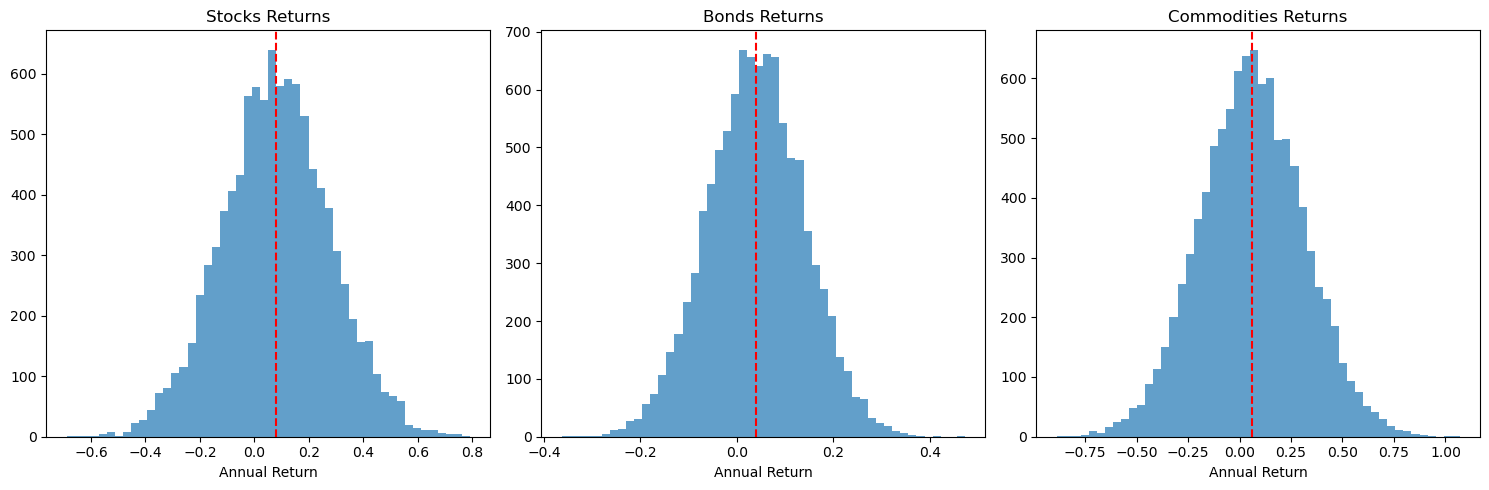

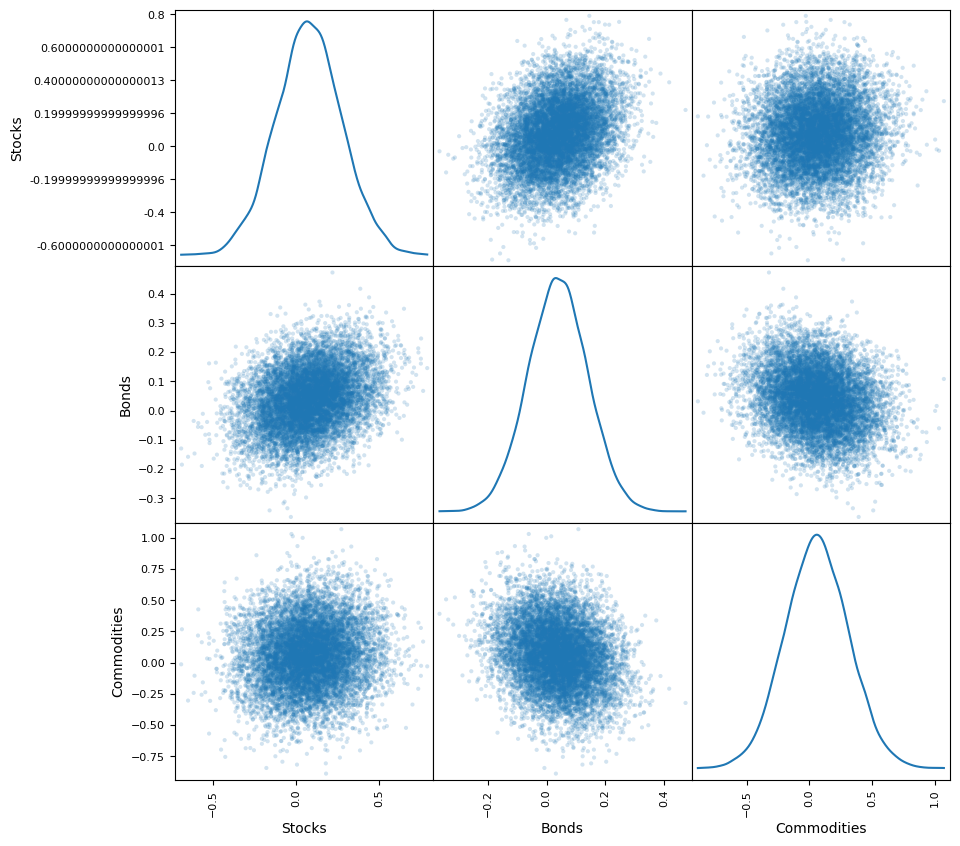

In [2]:
# Plot scatter matrix to visualize correlations
from pandas.plotting import scatter_matrix
import pandas as pd

# Financial example parameters
fin_mean = [0.08, 0.04, 0.06]
vols = [0.20, 0.10, 0.25]
corr = [
    [1.00, 0.30, 0.10],
    [0.30, 1.00, -0.20],
    [0.10, -0.20, 1.00]
]

# Convert correlation to covariance
fin_cov = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        fin_cov[i, j] = vols[i] * vols[j] * corr[i][j]

# Generate annual returns
annual_returns = generate_multivariate_normal(fin_mean, fin_cov, size=10000)

# Plot histograms of returns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
assets = ['Stocks', 'Bonds', 'Commodities']

for i in range(3):
    axes[i].hist(annual_returns[:, i], bins=50, alpha=0.7)
    axes[i].set_title(f'{assets[i]} Returns')
    axes[i].axvline(fin_mean[i], color='r', linestyle='--')
    axes[i].set_xlabel('Annual Return')
    
plt.tight_layout()
plt.show()



df = pd.DataFrame(annual_returns, columns=assets)
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

## Example 3: Generating a Multivariate Time Series

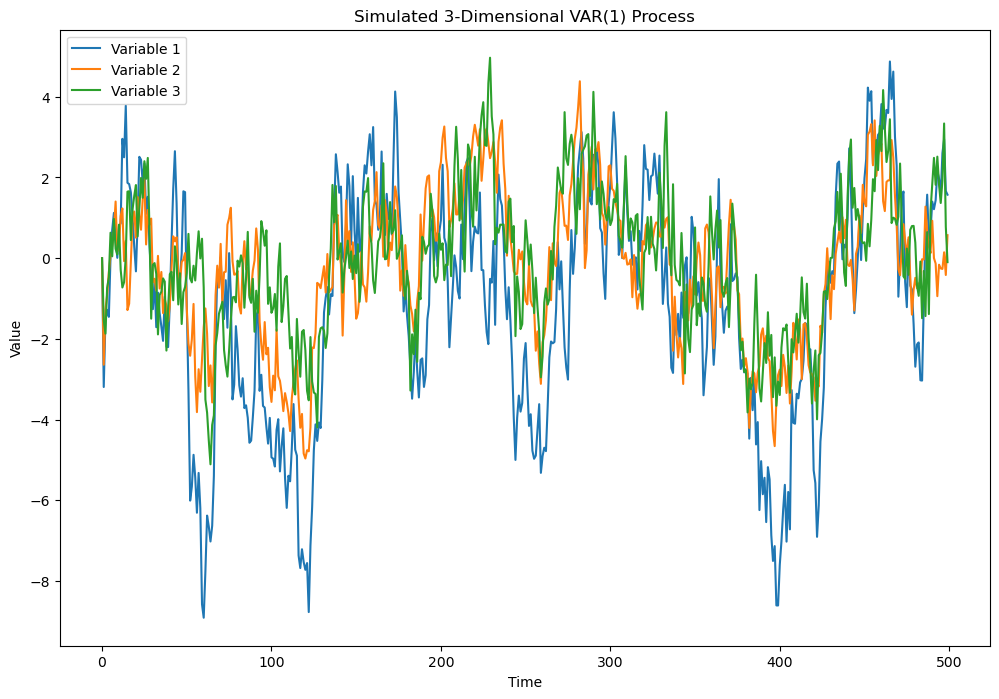

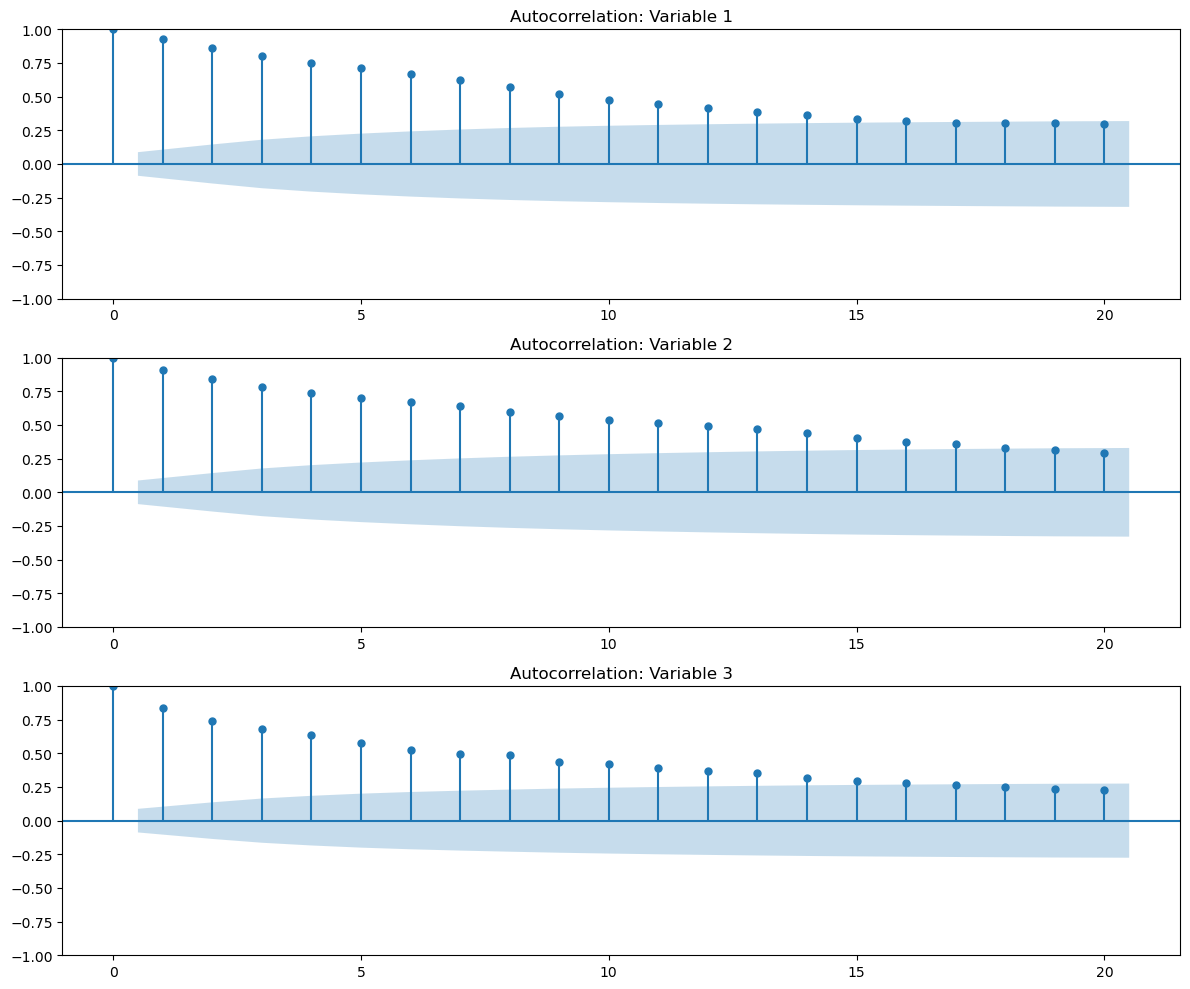

In [3]:
def generate_var1_process(A, cov, initial, steps):
    """
    Generate a VAR(1) process.
    
    Parameters:
    A (array): Coefficient matrix
    cov (array): Innovation covariance matrix
    initial (array): Initial value
    steps (int): Number of time steps
    
    Returns:
    Array of shape (steps, dim)
    """
    dim = len(initial)
    X = np.zeros((steps, dim))
    X[0] = initial
    
    # Generate innovations using Cholesky
    innovations = generate_multivariate_normal([0]*dim, cov, size=steps-1)
    
    # Generate the time series
    for t in range(1, steps):
        X[t] = np.dot(A, X[t-1]) + innovations[t-1]
    
    return X

# Parameters for a 3-dimensional VAR(1)
A = np.array([
    [0.9, 0.1, 0.0],
    [0.05, 0.8, 0.1],
    [0.0, 0.2, 0.7]
])

innovation_cov = np.array([
    [1.0, 0.3, 0.2],
    [0.3, 0.5, -0.1],
    [0.2, -0.1, 0.8]
])

initial = [0, 0, 0]
steps = 500

# Generate the VAR(1) process
var_process = generate_var1_process(A, innovation_cov, initial, steps)

# Plot the time series
plt.figure(figsize=(12, 8))
plt.plot(var_process)
plt.legend(['Variable 1', 'Variable 2', 'Variable 3'])
plt.title('Simulated 3-Dimensional VAR(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Plot autocorrelation functions
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
for i in range(3):
    plot_acf(var_process[:, i], ax=axes[i], lags=20)
    axes[i].set_title(f'Autocorrelation: Variable {i+1}')

plt.tight_layout()
plt.show()

## Decorrelation Using Cholesky

In [4]:
def decorrelate_data(X, mean, cov):
    """
    Transform correlated data into uncorrelated data.
    
    Parameters:
    X (array): Data with shape (n_samples, n_features)
    mean (array): Mean vector
    cov (array): Covariance matrix
    
    Returns:
    Array of shape (n_samples, n_features) with uncorrelated features
    """
    L = cholesky(cov)
    L_inv = np.linalg.inv(L)
    
    # Center the data and apply transformation
    X_centered = X - mean
    Z = np.dot(X_centered, L_inv.T)
    
    return Z

# Example: decorrelate some of our generated data
decorrelated = decorrelate_data(samples, mean, cov)

# Verify covariance is now identity
print("Covariance of decorrelated data:")
print(np.cov(decorrelated.T))

Covariance of decorrelated data:
[[ 0.97779156  0.00977135  0.00693532]
 [ 0.00977135  0.98882386 -0.02430799]
 [ 0.00693532 -0.02430799  1.02190587]]


## Application to Non-Normal Distributions
While we've focused on normal distributions, the Cholesky approach can be extended to generate samples from other distributions:

1. Use the inverse CDF transformation method to convert uniform random variables to your desired marginal distributions
2. Apply a Gaussian copula (based on Cholesky) to introduce the correlation structure

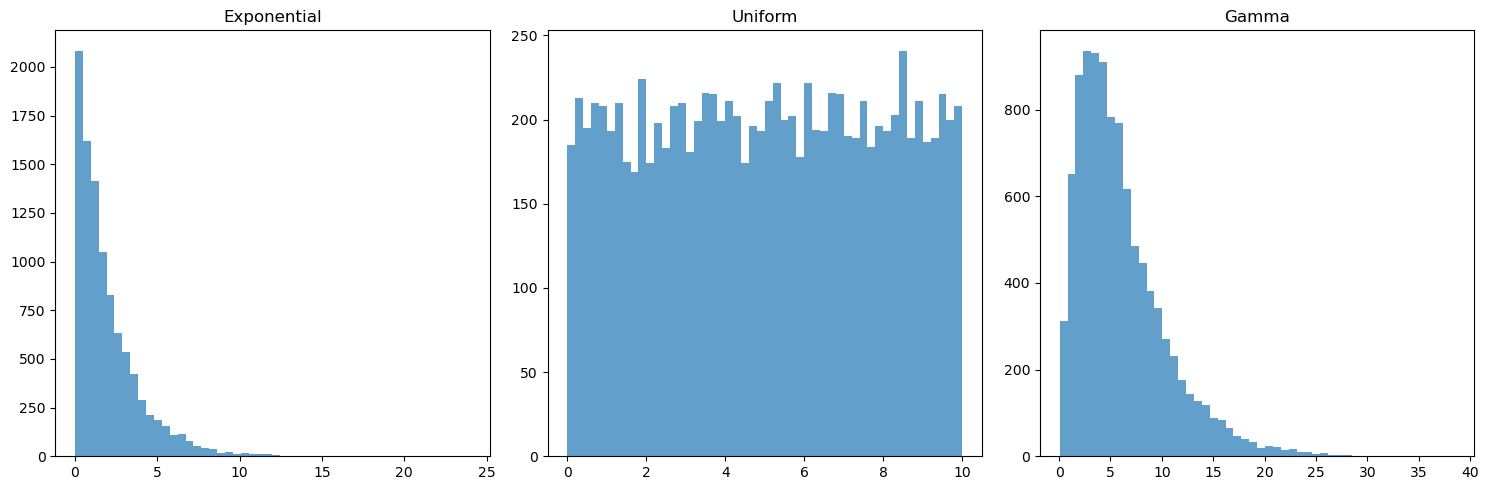

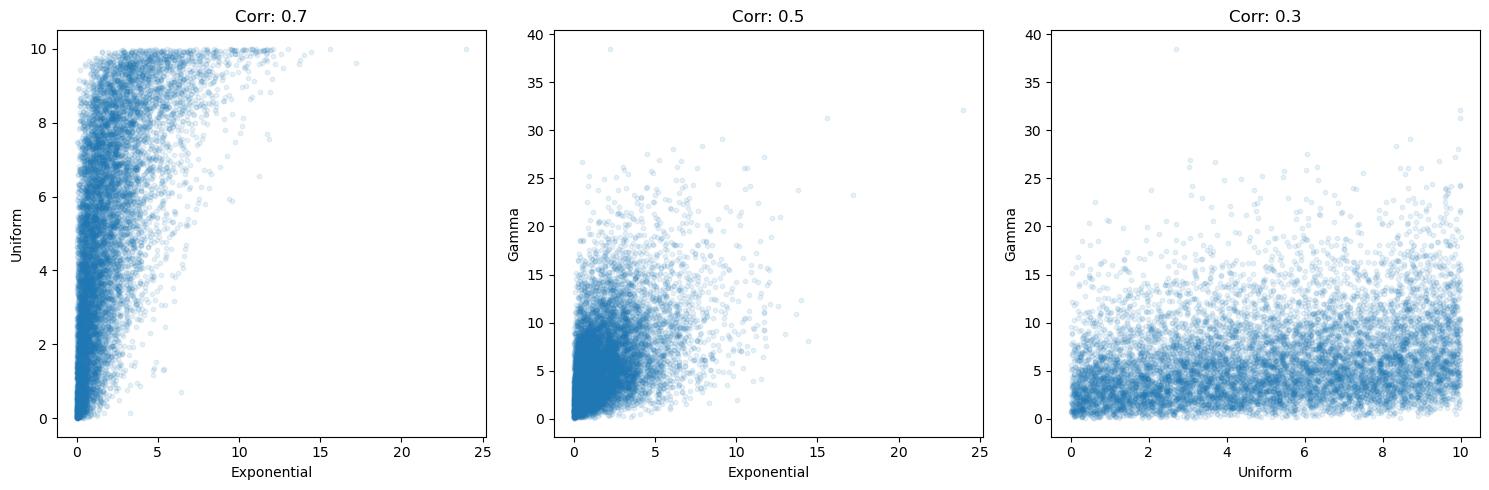

In [5]:
def generate_correlated_with_arbitrary_marginals(marginals, corr, size=1000):
    """
    Generate correlated random variables with arbitrary marginal distributions.
    
    Parameters:
    marginals (list): List of functions that transform U(0,1) to desired marginals
    corr (array): Correlation matrix for normal copula
    size (int): Number of samples
    
    Returns:
    Array of shape (size, len(marginals))
    """
    dim = len(marginals)
    
    # Generate correlated normal variables
    L = cholesky(corr)
    Z = np.random.normal(0, 1, size=(size, dim))
    X_normal = np.dot(Z, L.T)
    
    # Transform to uniform using normal CDF
    from scipy.stats import norm
    U = norm.cdf(X_normal)
    
    # Apply marginal transforms
    result = np.zeros((size, dim))
    for i in range(dim):
        result[:, i] = marginals[i](U[:, i])
    
    return result

# Example: Generate correlated exponential and uniform variables
from scipy.stats import expon, uniform, gamma

# Functions that transform uniform to desired distributions
marginals = [
    lambda u: expon.ppf(u, scale=2),  # Exponential with mean 2
    lambda u: uniform.ppf(u, loc=0, scale=10),  # Uniform on [0, 10]
    lambda u: gamma.ppf(u, a=2, scale=3)  # Gamma(2, 3)
]

# Correlation matrix
corr_matrix = np.array([
    [1.0, 0.7, 0.5],
    [0.7, 1.0, 0.3],
    [0.5, 0.3, 1.0]
])

# Generate samples
non_normal_samples = generate_correlated_with_arbitrary_marginals(
    marginals, corr_matrix, size=10000)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
dist_names = ['Exponential', 'Uniform', 'Gamma']

for i in range(3):
    axes[i].hist(non_normal_samples[:, i], bins=50, alpha=0.7)
    axes[i].set_title(dist_names[i])

plt.tight_layout()
plt.show()

# Scatter plots to visualize correlation
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
pairs = [(0, 1), (0, 2), (1, 2)]

for i, (a, b) in enumerate(pairs):
    axes[i].scatter(non_normal_samples[:, a], non_normal_samples[:, b], 
                   alpha=0.1, s=10)
    axes[i].set_xlabel(dist_names[a])
    axes[i].set_ylabel(dist_names[b])
    axes[i].set_title(f'Corr: {corr_matrix[a, b]:.1f}')

plt.tight_layout()
plt.show()

In [6]:
import requests
import pandas as pd

api_key = '982ZL89GAGWJ06YZ'
symbol = 'AMZN'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=5min&apikey={api_key}'
r = requests.get(url)
data = r.json()

df = pd.DataFrame.from_dict(data, orient='index')
df

,1. Information,2. Symbol,3. Last Refreshed,4. Interval,5. Output Size,6. Time Zone,2025-03-14 19:55:00,2025-03-14 19:50:00,2025-03-14 19:45:00,2025-03-14 19:40:00,...,2025-03-14 12:25:00,2025-03-14 12:20:00,2025-03-14 12:15:00,2025-03-14 12:10:00,2025-03-14 12:05:00,2025-03-14 12:00:00,2025-03-14 11:55:00,2025-03-14 11:50:00,2025-03-14 11:45:00,2025-03-14 11:40:00
Meta Data,"Intraday (5min) open, high, low, close prices ...",AMZN,2025-03-14 19:55:00,5min,Compact,US/Eastern,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time Series (5min),NaN,NaN,NaN,NaN,NaN,NaN,"{'1. open': '198.0000', '2. high': '198.0600',...","{'1. open': '197.9988', '2. high': '198.0000',...","{'1. open': '197.9900', '2. high': '198.0000',...","{'1. open': '197.8900', '2. high': '198.0000',...",...,"{'1. open': '197.5050', '2. high': '197.7500',...","{'1. open': '197.1500', '2. high': '197.5500',...","{'1. open': '197.1400', '2. high': '197.2600',...","{'1. open': '197.2600', '2. high': '197.3400',...","{'1. open': '197.5600', '2. high': '197.6000',...","{'1. open': '197.7500', '2. high': '197.8200',...","{'1. open': '197.2900', '2. high': '197.7696',...","{'1. open': '197.4900', '2. high': '197.5100',...","{'1. open': '198.0204', '2. high': '198.0700',...","{'1. open': '198.1000', '2. high': '198.2500',..."


In [7]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "IBM"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker.history(period="1y")  # data for the last year
print("Historical Data:")
print(historical_data)

# Fetch basic financials
financials = ticker.financials
print("\nFinancials:")
print(financials)

# Fetch stock actions like dividends and splits
actions = ticker.actions
print("\nStock Actions:")
print(actions)


Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-03-15 00:00:00-04:00  185.743536  186.778715  184.495498  184.853470   
2024-03-18 00:00:00-04:00  185.462977  186.943197  184.127886  185.453308   
2024-03-19 00:00:00-04:00  185.259821  187.281818  184.089182  187.049622   
2024-03-20 00:00:00-04:00  186.594897  187.668783  185.085654  187.649445   
2024-03-21 00:00:00-04:00  186.720681  187.078638  183.827956  185.656464   
...                               ...         ...         ...         ...   
2025-03-10 00:00:00-04:00  261.559998  266.450012  254.750000  256.899994   
2025-03-11 00:00:00-04:00  255.990005  256.700012  245.860001  248.949997   
2025-03-12 00:00:00-04:00  250.350006  253.130005  245.529999  249.630005   
2025-03-13 00:00:00-04:00  248.800003  249.270004  243.039993  245.800003   
2025-03-14 00:00:00-04:00  242.750000  248.949997  241.6799

In [30]:
import yfinance as yf
print(yf.__version__)


0.2.53
